<a href="https://www.kaggle.com/code/lostinworlds/generative-ai-nlp?scriptVersionId=114628329" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction 
As AI technology continues to develop, it is increasingly being into question the bounders between human uniqueness and machines. This subcategory of AI, generative AI, "*refers to unsupervised and semi-supervised machine learning algorithms that enable computers to use existing content like text, audio and video files, images, and even code to create new possible content*." ([AltexSoft, 2022](https://www.altexsoft.com/blog/generative-ai/)). These algorithms are changing fields of art and literature. 

The discourse around this technology is highly polarised with those in favour stating that “*this AI has no idea what’s culturally relevant or what is politically relevant or whatever it is that is currently important in the zeitgeist. It’s a mindless but very intelligent music creation system*.” ([Thompson, 2019](https://www.motherjones.com/media/2019/03/what-will-happen-when-machines-write-songs-just-as-well-as-your-favorite-musician/)) On the other hand, those against such developments fear that it will strip the role of humans and what it entails to be uniquely human. 

 In this project, the impact of generative AI particularly through the use of NLP on art and literature will be examined. It will also look at what the concerns are around this topic and the validity of these concerns.  

# Art

In [1]:
#exclude warning
import warnings
warnings.filterwarnings("ignore", message="Consider using IPython.display.IFrame instead")

#import library 
from IPython.display import HTML

#inbed video
HTML('<<iframe width="560" height="315" src="https://www.youtube.com/embed/SVcsDDABEkM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In the remit of art,  AI is transforming the landscape. Software such as [DALL-E 2](https://openai.com/dall-e-2/) and [Stable Diffusion](https://stablediffusionweb.com/) are able to transform text into images. These software can create an image simply with a few lines of code. In the case of Stable Diffusion, this code is as follows: 

In [2]:
 # note for this i have changed the accelerator to GPU T4x2. torch (cuba) function doesnt run otherwise

# set enviroment
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy 

# import libraries
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

import torch
from torch import autocast

#set up pipe to connect and run stable diffusion
model_id = "stabilityai/stable-diffusion-2"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-01u7_5zj
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-01u7_5zj
  Resolved https://github.com/huggingface/diffusers.git to commit 9be94d9c6659f7a0a804874f445291e3a84d61d4
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 kB 16.7 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.12.0.dev0-py3-none-any.whl size=533280 sha256=a9665b6394e8d17fa8c0fe973d880d4f6414d947e903233876f14463d8431c1f
  Stored in directory: /tmp/pip-ephem-wheel-cache-ie0_9gu6/wheels/02/d2/24/9d4a75289c359ffceca56b42aecb8e8fbf659c455bcd4d2eca
Successfully built diffusers
  Attempting uninstall: accelerate
   

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/815 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/900 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/602 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Setting the prompt and image size to the following creates image:

  0%|          | 0/50 [00:00<?, ?it/s]

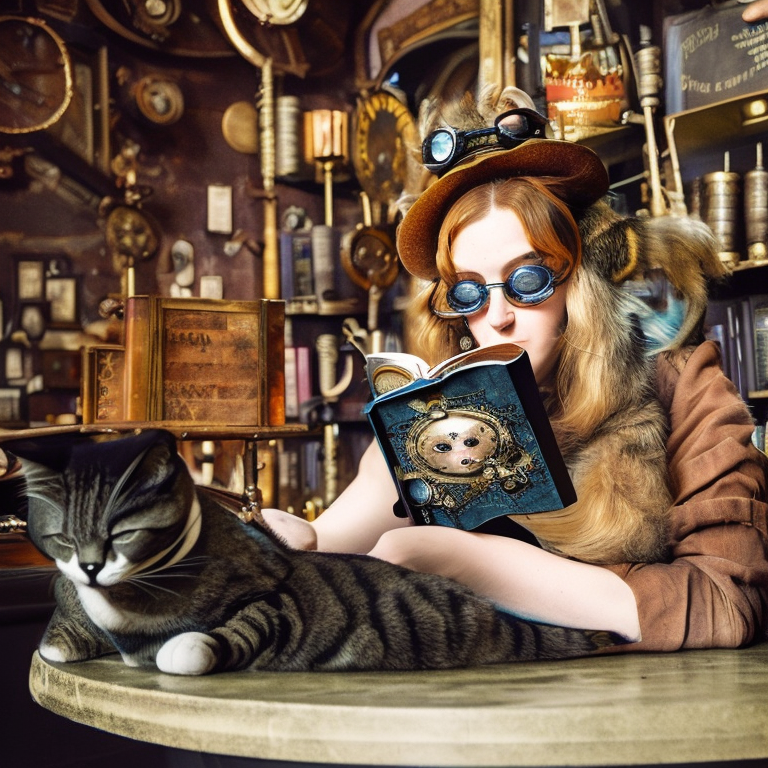

In [3]:
prompt = 'A steampunk woman reading a book with her cat at the bar'

image = pipe(prompt, height=768, width=768).images[0]
image

Art may be in the eye of the beholder, however, one may regard some of these images as requiring some further hours of practice to be regarded as an masterpiece. 

Dall-E 2, which became upon for the public without a waiting list in September 2022 ([Darby, 2022](https://www.zdnet.com/article/how-to-use-dalle-2-to-turn-your-wildest-imaginations-into-tangible-art/)), produces somewhat better images and includes the following:

![4IzdfRrxgbvtnE0ZBNEjlcFcxgc.jpg](https://cdn.openai.com/dall-e-2/demos/text2im/soup/portal/digital_art/4.jpg)

Both DALL-E 2 and Stable Diffusion uses NLP to tokenise a prompt, vectorizes it and through the use of recurrent neural networks generates an image, comparing the resulting vector to a dataset of pre-existing images and labels ([Tilbe, 2022](https://pub.towardsai.net/how-dall-e-2-understands-human-language-22cd2df5aad3)). This dataset and its quality has been brought into question as artists have found that their copyrighted images gave been utilised. Moreover, Clarke ([2022](https://www.theguardian.com/technology/2022/nov/12/when-ai-can-make-art-what-does-it-mean-for-creativity-dall-e-midjourney)) reports in her article: 
> "It’s not just artworks: analysis of the training database for Stable Diffusion has revealed it also sucked up private medical photography, photos of members of the public (sometimes alongside their full names), and pornography."

Solutions to such issues have yet to be established and remains a point of concern. That said, in the use of both DALL-E 2 and Stable Diffusion, humans remain integral as key words need to be feed to the AI for it to create art. Subsequently, as highlighted in the video by Vox, new artists have emerged who use AI to create their art and their skill lies in their ability to create the most effective prompts that push the AI to its creative limits.  

# Literature & Writing
In terms of literature and written text generative AI has been used to create new novels as well as other documents. One major example of such texts is the novel, Harry Potter and the Portrait of What Looked Like a Large Pile of Ash. 


Created by Botnik, a machine entertained company, uses computers to remix text. It used NLP and generative AI to create a new Harry Potter novel drawing upon the 7 previously published books which have been fed into the model Voicebox, "*which determines the high-frequency words and incorporates them into a 'predictive writer' that resembles the text message screen on a phone*." ([Tobias, 2018](https://www.washingtonpost.com/lifestyle/can-algorithms-be-funny-veterans-of-clickhole-and-the-new-yorker-team-up-to-find-out/2018/04/04/48b23e1e-36b0-11e8-8fd2-49fe3c675a89_story.html)). This process produces funny text such as: 

> “*He saw Harry and immediately began to eat Hermione’s family. Ron’s Ron shirt was just as bad as Ron himself*.
> ‘*If you two can’t clump happily, I’m going to get aggressive,’ confessed the reasonable Hermione*.”

It should be emphasised that the purpose of this text and of Botnik who created it is in essence create a new form of art, rather than to replace it. 

> “*We would like, selfishly, not to replace humanity with algorithms. instead, we want to find natural ways for people and machines to interact to create what neither would have created alone*.” ([Flood, 2017](https://www.theguardian.com/books/booksblog/2017/dec/13/harry-potter-botnik-jk-rowling))


More serious attempts have also been made to use AI in the creation of stories and includes the attempt by Marche ([2017](https://www.wired.com/2017/12/when-an-algorithm-helps-write-science-fiction/)). This system requires a large quantity of pre-existing text and even then received negative reviews from experienced editors. 

# Creation of Generative AIs
As indicated previously, the process to make such AIs is to use pre-existing piece of work and train an AI to assess how the author uses a set of words. It is then asked to create text with new information. A number of NLP libraries exist and they typically utilise deep learning recurrent neural network or RNN to conduct such predictions. These "*are a class of neural networks that allow previous outputs to be used as inputs while having hidden states*." ([Amidi and Amidi, 2021](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks))

For example, LSTM (Long short term memory units) which uses a cell state and forget gate which eliminates some information which is considered not important and stores some key information which is to be passed to the next step. Its capabilities can be viewed by applying it to an existing text. 

The novel Sanditon is an unfinished novel by Jane Austin. This now copyright free text was written in 1817 and consists of 24,000 words. ([Project Gutenberg Australia, 2013](https://gutenberg.net.au/ebooks/fr008641.html#:~:text=Sanditon%20was%20the%20last%20work,and%20evolving%20work%20of%20fiction.)) The tale, in its early stages, lacks a robust plot though the world has been established.([Jane Austen House, 2022](https://janeaustens.house/sanditon/))  Tokenising the version used for this project reveals that it is a little shorter at 23,886. The text also has approx. 3784 unique words.

In [4]:
def read_file(filepath):
    
    with open(filepath) as f:
        str_text = f.read()
    
    return str_text

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/northanger-abbey-by-jane-austen/sanditon-1837.txt
/kaggle/input/northanger-abbey-by-jane-austen/The Project Gutenberg eBook of Northanger Abbey by Jane Austen.txt


In [5]:
d = read_file('/kaggle/input/northanger-abbey-by-jane-austen/sanditon-1837.txt')
main_text = d[164:-20]

In [6]:
import spacy 
nlp = spacy.load("en_core_web_lg", disable =["parser", "tagger", "ner"])

nlp.max_length = len(main_text)

In [7]:
def seperate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text)if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [8]:
tokens = seperate_punc(main_text)

In [9]:
# number of tokens
len(tokens)

23886

In [10]:
train_len = 25+1

# create text sequnces of 25 strings
text_sequences =[]

for i in range(train_len, len(tokens)):
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)

In [11]:
" ".join(text_sequences[0])

'a gentleman and a lady travelling from tunbridge towards that part of the sussex coast which lies between hastings and eastbourne being induced by business to'

In [12]:
# tokenize text sequences

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [13]:
# identify vocabulary size 
vocabulary_size = len(tokenizer.word_counts)
vocabulary_size

3784

The model will be constructed using string sequences of 24 characters with the intension that the model will predict the 25th word. This can then be repeated using the new string and using n-1 to n words and thus predicting the 26th word. This specific model uses 5 layers including an embedding layer to cover the data so as it can be utilised in subsequent layers effectively. This method has been provided as part of the [NLP - Natural Language Processing with Python](https://www.udemy.com/course/nlp-natural-language-processing-with-python/) course by [Jose Portilla](https://www.udemy.com/user/joseportilla/). 



In [14]:
import numpy as np

# convert sequences to numpy array for keras
sequences = np.array(sequences)

# keras library for modeling
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding


# create model
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 25, input_length=seq_len))
    model.add(LSTM(125, return_sequences=True))
    model.add(LSTM(125))
    model.add(Dense(150, activation='relu'))

    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   
    model.summary()
    
    return model

In [15]:
from tensorflow.keras.utils import to_categorical

# create x and y variables
X = sequences[:,:-1]
y = sequences[:,-1]

y = to_categorical(y, num_classes = vocabulary_size+1)

seq_len = X.shape[1]

In [16]:
# view summary of the model
model = create_model(vocabulary_size+1, seq_len)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 25)            94625     
_________________________________________________________________
lstm (LSTM)                  (None, 25, 125)           75500     
_________________________________________________________________
lstm_1 (LSTM)                (None, 125)               125500    
_________________________________________________________________
dense (Dense)                (None, 150)               18900     
_________________________________________________________________
dense_1 (Dense)              (None, 3785)              571535    
Total params: 886,060
Trainable params: 886,060
Non-trainable params: 0
_________________________________________________________________


The model with over 300 epochs provides the following results:

In [17]:
# fit model
model.fit(X, y, batch_size = 200, epochs = 300, verbose = 1)

2022-12-24 10:04:09.847740: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 361240400 exceeds 10% of free system memory.
2022-12-24 10:04:10.388276: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 361240400 exceeds 10% of free system memory.


Epoch 1/300
120/120 [==============================] - 5s 12ms/step - loss: 6.8485 - accuracy: 0.0419
Epoch 2/300
120/120 [==============================] - 1s 11ms/step - loss: 6.4449 - accuracy: 0.0454
Epoch 3/300
120/120 [==============================] - 2s 14ms/step - loss: 6.3668 - accuracy: 0.0446
Epoch 4/300
120/120 [==============================] - 1s 11ms/step - loss: 6.2585 - accuracy: 0.0503
Epoch 5/300
120/120 [==============================] - 1s 11ms/step - loss: 6.1323 - accuracy: 0.0649
Epoch 6/300
120/120 [==============================] - 2s 13ms/step - loss: 5.9960 - accuracy: 0.0703
Epoch 7/300
120/120 [==============================] - 2s 13ms/step - loss: 5.8962 - accuracy: 0.0730
Epoch 8/300
120/120 [==============================] - 1s 11ms/step - loss: 5.8186 - accuracy: 0.0744
Epoch 9/300
120/120 [==============================] - 1s 11ms/step - loss: 5.7546 - accuracy: 0.0785
Epoch 10/300
120/120 [==============================] - 1s 11ms/step - loss: 5.700

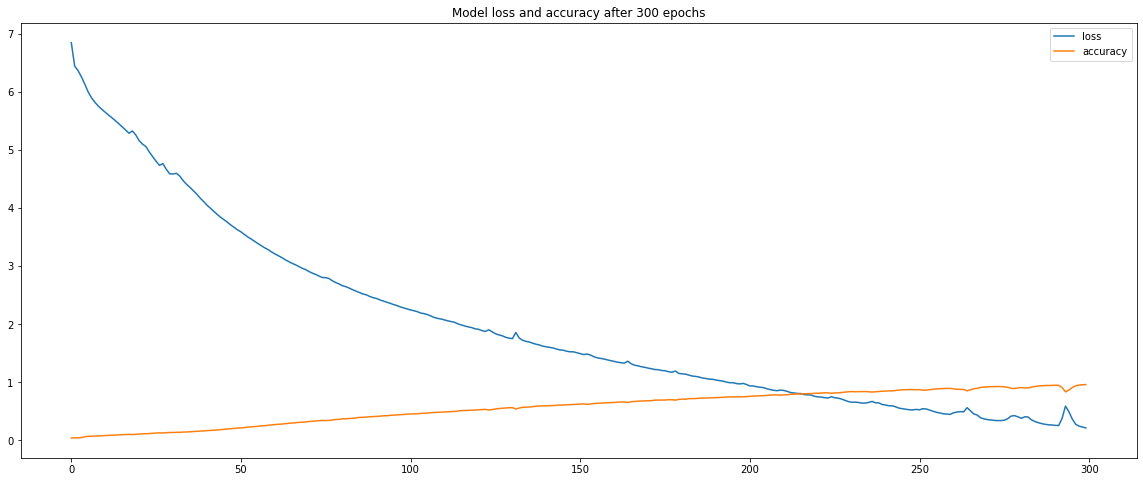

In [18]:
import pandas as pd
history = model.history.history
loss_df =pd.DataFrame(history)
loss_df.plot(figsize =(20,8), title ="Model loss and accuracy after 300 epochs");

In [19]:
from pickle import dump, load

In [20]:
model.save("Sanditon_text_generation.h5")
dump(tokenizer, open("Sanditon_tokenizer", "wb"))

In [21]:
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [22]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    '''
    
    # Final Output
    output_text = []
    
    # Intial Seed Sequence
    input_text = seed_text
    
    # Create num_gen_words
    for i in range(num_gen_words):
        
        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        # Pad sequences to our trained rate (50 words in the video)
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        # Predict Class Probabilities for each word
        #pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]
        
        predict_x=model.predict(pad_encoded, verbose=0) 
        classes_x=np.argmax(predict_x,axis=1)
         
        pred_word_ind = classes_x[0]
        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind] 
        
        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
        
    # Make it look like a sentence.
    generated_text =  ' '.join(output_text)

    print("Original text:",seed_text, "...\n\nAI generated text:", generated_text)

In [23]:
text_sequences[-1]

['him',
 'hardly',
 'used',
 'to',
 'be',
 'obliged',
 'to',
 'stand',
 'back',
 'in',
 'his',
 'own',
 'house',
 'and',
 'see',
 'the',
 'best',
 'place',
 'by',
 'the',
 'fire',
 'constantly',
 'occupied',
 'by',
 'sir',
 'h.']

Utilising this model on a random 26 word string from the existing text, can yield results such as the following: 

In [24]:
import random
random.seed(101)
random_pick = random.randint(0,len(text_sequences))

In [25]:
random_seed_text = text_sequences[random_pick]

In [26]:
len(random_seed_text)

26

In [27]:
# run model on random set 
seed_text = ' '.join(random_seed_text)
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=25)

Original text: rend='italic'>was</emph an arrival at the hotel but not its amount their visitors answered for two hack chaises could it be the camberwell seminary no no had ...

AI generated text: there been a third carriage perhaps it might but it was very generally agreed that two hack chaises could never contain a seminary mr. mr.


Applying this to the later stages of the text, returns the following: 

In [28]:
# extract the 10th set of 25 word string from the end and run model
seed_text = ' '.join(text_sequences[-10])
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=25)

Original text: poor mr. hollis lt was impossible not to feel him hardly used to be obliged to stand back in his own house and see the best ...

AI generated text: place by the fire constantly occupied by sir h. h. h. h. h. h. h. h. h. h. h. h. h. h. h. h. h.


Alas this highlights that there may be some overfitting in the model as it performed better on a section of the text but struggled to perform and create new text. However this establishes how models such as this can generate new text. More advanced models as well as further text cleaning will return better quality text.

# Conclusion 
As AI develops, there is no doubt that it will not only shape our general lives but also what we consider as uniquely human. Creative fields such as music, arts and literature have already seen the impact of AI and this is unlikely to stop in the near future. 

However, as experts frequently note, AIs are so called for a reason. They rely on existing data to create and human involvement is likely to continue for some time. In addition, creative fields such as art and literature, typically aim to explore social and personal challenges issues that at times may be completely knew. For example, conveying life during lockdown or coming of age in a post social media world. They can also use a myriad of formats. For art, this may include water painting, sculpturing and other mediums. For literature, it may be the use of an unreliable narrator, use of second person or using different formats in one tale to convey a story. 

This is not to say that AI will not pose a challenge to artists. The capitalist mentality of profits for agencies is sadly an issue that will shape the future of the creative sectors. That said, it is likely to do so regardless of the developments in AI. For example . 

However, the notion that AI would completely strip humans form such sectors may still be a notion for a distance future which may never arrive. 
